# Project 2: An Investigation of Cardiovascular Risk Factors

**Team Members:** Tejasvi Kalakota, Mariam Elshenawy

**Course:** DS200, Section 8, Group 6

**Date:** 2023 Dec 12

**Data Set:** https://www.kaggle.com/datasets/captainozlem/framingham-chd-preprocessed-data/

**GitHub Repository:** Project2_Elshenawy_Kalakota

## Dataset Structure:

The dataset contains over 4,000 records with 16 attributes:

Demographics:
1) Sex: male or female (nominal).

2) Age: patient age (continuous).


Behavioral:

3) Education: 0=less than high school and high school degrees, 1=college degree and higher (nominal).

4) currentSmoker: 1=patient is a smoker or 0=non-smoker (nominal).

5) cigsPerDay: the number of cigarettes that the person smoked on average in one day (continuous).



Medical (history):

6) BPMeds: 1=on BP meds, 0=Not on BP meds (nominal).

7) prevalentStroke: 1=patient had previously had a stroke, 0=no history of stroke (nominal).

8) prevalentHyp: 1=patient was hypertensive, 0=not hypertensive (nominal).

9) diabetes: 1=patient had diabetes, 0=no diabetes (nominal).



Medical (current):

10) totChol: total cholesterol level (continuous)

11) sysBP: systolic blood pressure (continuous)

12) diaBP: diastolic blood pressure (continuous)

13) BMI: Body Mass Index (continuous)

14) Heart Rate: heart rate (continuous - in medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

15) Glucose: glucose level (continuous)


Predict variable:

16) 10 year risk of coronary heart disease CHD (1=Yes, 0=No)


Appendix

http://www.who.int/mediacentre/factsheets/fs317/en/


Data Source References

https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data



## Introduction:

As a student with a chronic respiratory condition, I became invested in community health outreach. I participated in clinical outreach events through an organization called North American Disease Intervention now known as APSEA. Through my work I have realized that Cardiovascular Disease has created a wide scale in economic burden and emotional hardship throughout the country. In fact, jarring statistics have been published by the CDC indicating that heart disease is the leading cause of death across all gender and most ethnic and racial groups in the United States (CDC, 2022).  Behavioral Health factors like smoking and alcohol consumption are considered cardiovascular risk factors, but the exact causal relationship between cardiovascular disease between these factors is still not fully understood. A report published in 2010 outlines that smoking cigarettes stimulates the sympathetic nervous system and has an immediate hypertensive impact, which in turn may have perilous effects on blood pressure (Giannarelli, 2010). Similarly, a Meta-Analysis study conducted in 2019 found that dietary interventions resulting in weight reduction have contributed to improved glycemic control and lipid profiles (Liatis, 2019). Therefore, there is much value in investigating how core health behaviors associated with cardiovascular health like and smoking, are related to documenting cardiovascular health factors like cholesterol, blood pressure, and glucose control.  Understanding the relationships between health behaviors and health factors like blood pressure is vital to developing novel therapeutics for treating cardiovascular disease as well as formulating community health interventions to reduce the risk of heart disease.

### Primary Data Science Question

How do cardiovascular features  (e.g., blood pressure, cholesterol) of patients who smoke vary from those who do not?



## Sanity Check & Data Cleaning

Before starting our analysis, we wanted to perform a quick sanity check on the dataset. The Framingham data is known for its integrity, however, we wanted to complete our due diligence and check before proceeding. We will especially focus on attributes that are critical for the quality of our analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#helps vizualizations appear in this notebook
%matplotlib inline

FCDD = pd.read_csv('framingham.csv')

FCDD.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### 1. Missing Value Analysis


First, we will check the dataset for any missing values within each column, as this would negatively affect the quality of our analysis.

In [2]:
missingValues = FCDD.isnull().sum()
print(missingValues)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


It appears there are no missing values.

### 2. Data Type Validation

Next, we want to check the dtypes of each of our columns to make sure they are the correct type per attribute; e.g. integers, floats.

In [3]:
print(FCDD.dtypes)

male                 int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


### 3. Statistical Summary & Outliers

Next, we will generate a statistical summary for the dataset to visualize data distribution and identify outliers.

In [4]:
statSummary = FCDD.describe()
print(statSummary)

              male          age    education  currentSmoker   cigsPerDay  \
count  4133.000000  4133.000000  4133.000000    4133.000000  4133.000000   
mean      0.427293    49.557222     0.280668       0.494798     9.101621   
std       0.494745     8.561628     0.449380       0.500033    11.918440   
min       0.000000    32.000000     0.000000       0.000000     0.000000   
25%       0.000000    42.000000     0.000000       0.000000     0.000000   
50%       0.000000    49.000000     0.000000       0.000000     0.000000   
75%       1.000000    56.000000     1.000000       1.000000    20.000000   
max       1.000000    70.000000     1.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4133.000000      4133.000000   4133.000000  4133.000000  4133.000000   
mean      0.034358         0.006049      0.311154     0.025647   236.664408   
std       0.182168         0.077548      0.463022     0.158100    43.909188   

Key Takeaways:
1. Age range is 32 to 70 years old - within normal range.
2. CigsPerDay has a max of 70, seems high, but on investigation, that is about 3.5 packs per day, which is plausible.
3. BPMeds, PrevalentStroke, PrevalentHyp, Diabetes, TenYearCHD all are binary values and summary appears normal.
4. Total Cholesterol max value is 600 which is very high, may be an outlier, but on investigation, it is plausible.
5. sysBP and diaBP - max sysBP is 295 and max diaBP is 142.5. Both are extremely high and would indicate severe hypertension or possible outliers, but upon investigation, they are plausible.
6. BMI range is 15 to 56 - both are plausible in a population, 56 is severe morbid obesity, 15 is underweight.
7. Heart Rate - ranges from 44 to 143, all are normal range, and per investigation, 143 is likely tachycardia.
8. Glucose - max was 394, which is high, but plausible in uncontrolled diabetes.

### 4. Correlation Analysis

Next, we'll generate a correlation matrix to identify relationships between variables.

In [5]:
corrMatrix = FCDD.corr()
print(corrMatrix)

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.029085   0.004725       0.199750    0.320773   
age             -0.029085  1.000000  -0.076576      -0.212415   -0.192079   
education        0.004725 -0.076576   1.000000      -0.013964   -0.018521   
currentSmoker    0.199750 -0.212415  -0.013964       1.000000    0.771739   
cigsPerDay       0.320773 -0.192079  -0.018521       0.771739    1.000000   
BPMeds          -0.055519  0.142893  -0.014353      -0.056488   -0.050877   
prevalentStroke -0.004304  0.058712  -0.027895      -0.033515   -0.033658   
prevalentHyp     0.003700  0.309546  -0.063900      -0.105899   -0.069803   
diabetes         0.017658  0.101186  -0.022996      -0.041171   -0.035805   
totChol         -0.073074  0.266915  -0.010839      -0.046711   -0.024522   
sysBP           -0.036736  0.394675  -0.099056      -0.130008   -0.089390   
diaBP            0.055970  0.209126  -0.048563      -0.108591   -0.055252   

Key Takeaways:

1. currentSmoker and cigsPerDay are correlated as expected.
2. Diabetes and Glucose are correlated as expected.
3. Blood Pressure sysBP and diaBP are highly correlated, along with prevalentHyp, as expected.
4. TenYearCHD shows a strong correlation with age and prevalentHyp, as expected.
5. Most importantly as it relates to our analysis, there is a strong correlation with currentSmoker and cigsPerDay, as expected, but strangely there is not a strong correlation between these attributes and tenYearCHD, which is surprising. We will investigate further during our analysis.

### 5. Data Integrity Check

Here, we will do a quick check to see, especially for our binary attributes for our analysis, if there are any issues with unique values outside of the expected 0, 1.

In [6]:
catColumns = ['education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
for column in catColumns:
    uniqueValues = FCDD[column].unique()
    print(f"Unique values in {column}: {uniqueValues}")

Unique values in education: [1 0]
Unique values in currentSmoker: [0 1]
Unique values in BPMeds: [0. 1.]
Unique values in prevalentStroke: [0 1]
Unique values in prevalentHyp: [0 1]
Unique values in diabetes: [0 1]
Unique values in TenYearCHD: [0 1]


The above all check out across all of these columns. The only oddity is the float for BPMeds, but we don't anticipate it will cause any issues with our analysis.

### 6. Duplicate Record Check

Finally, we will assess if there are any duplicate records present.

In [7]:
duplicateRecord = FCDD.duplicated().sum()
print(f"Duplicate row count: {duplicateRecord}")

Duplicate row count: 0


It appears there are no duplicate records.

### Summary of Sanity Check & Data Cleaning Needs

Cleaning Actions Required: None.

1. No missing values.

2. Data types are valid.

3. Ranges and Stats are valid and plausible. There were some high values, but none 
that were outside of the realm of possibility.

4. Correlations are valid.

5. No issues with unique values in key binary columns.

6. No duplicate records.


Now that we have completed our sanity check, and there are no glaring data cleaning needs, we will move onto our analysis, first starting with an initial exploration.

## Initial Exploration

Let us first begin with a general exploration of basic statistics for coronary heart disease risk factors against currentSmoker and see what we get.

In [8]:
basicStats = FCDD.groupby('currentSmoker')[['totChol','sysBP', 'diaBP']].describe()
print(basicStats)

              totChol                                                     \
                count        mean        std    min    25%    50%    75%   
currentSmoker                                                              
0              2088.0  238.693966  44.396434  107.0  208.0  236.0  266.0   
1              2045.0  234.592176  43.318869  113.0  205.0  232.0  260.0   

                       sysBP              ...                 diaBP  \
                 max   count        mean  ...    75%    max   count   
currentSmoker                             ...                         
0              600.0  2088.0  135.207615  ...  147.0  295.0  2088.0   
1              453.0  2045.0  129.466748  ...  140.0  230.0  2045.0   

                                                                    
                    mean        std   min   25%   50%   75%    max  
currentSmoker                                                       
0              84.156609  12.010543  51.0  76.0  83.0  9

In [9]:
grouped_data = FCDD.groupby(['TenYearCHD', 'male', 'currentSmoker'])[['age', 'sysBP', 'diaBP', 'heartRate', 'BMI', 'cigsPerDay']].mean()

# Rename index levels
grouped_data = grouped_data.rename(index={0: 'Female', 1: 'Male'}, level='male')
grouped_data = grouped_data.rename(index={0: 'No Risk', 1: 'CHDRisk'}, level='TenYearCHD')
grouped_data = grouped_data.rename(index={0: 'NonSmoker', 1: 'Smoker'}, level='currentSmoker')
grouped_data.index = grouped_data.index.set_names(['TenYearCHDRisk', 'Sex', 'Smoking Status'])
grouped_data
grouped_data.to_csv("Feature_Chart.csv")

Key Points from table above:
- Cigarettes Per Day
    - Females smoked on average few Cigarettes per Day compared to their male counterparts among those with and without a risk of CHD(coronary heart disease)
    - Both sexes within CHD Risk group on average smoked more Cigarettes per Day compared with the No Risk group counterparts
- Heart Rate
    - Females have elevated heart rate compared to male counterparts in all subgroups
    - With both CHD risk groups: Males and Females who smoke have a slightly elevated heart rate compared to males and females who do not
- Cholesterol
    - In all subgroups Non-smokers appear to have a slightly higher Cholesterol values compared to smokers, and this is particularly apparent with Females who have a risk of CHD

On first look, it seems counterintuitive to what we thought we would see, which is that non-smokers seem to have a marginally higher cholestrol, sysBP, and diaBP than smokers. The difference appears negligable at this point though, and we need more context. Let's try to generate box plots and histograms for these three factors against currentSmoker.

# Blood Pressure Metrics

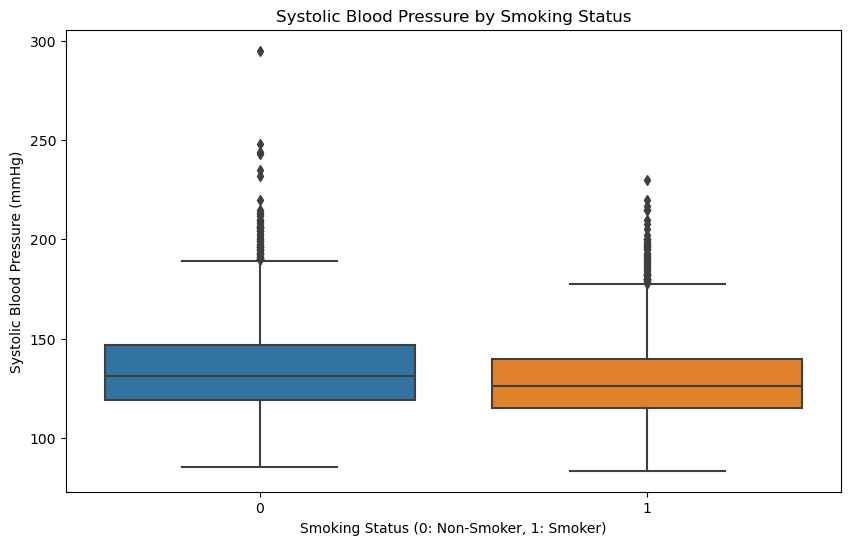

In [10]:
# Box Plot to Compare Systolic Blood Pressure v. Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='currentSmoker', y='sysBP', data=FCDD)
plt.title('Systolic Blood Pressure by Smoking Status')
plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.show()


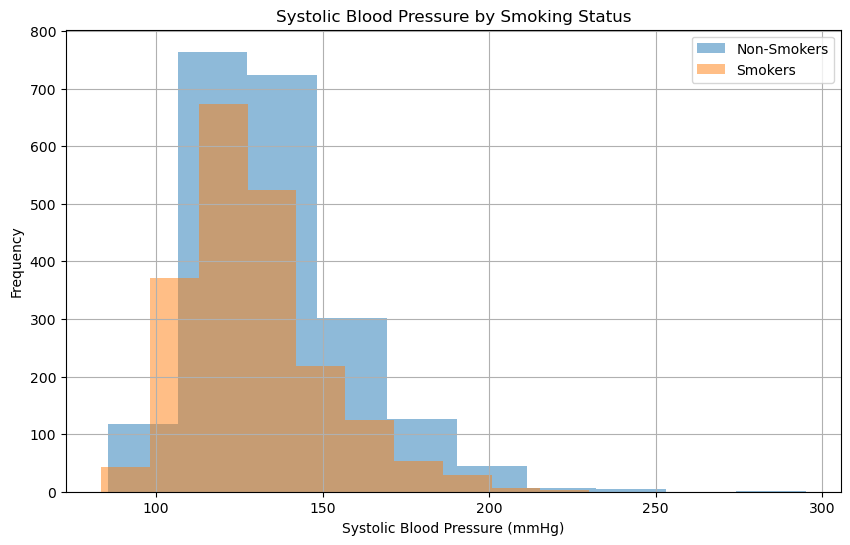

In [11]:
plt.figure(figsize=(10, 6))
FCDD[FCDD['currentSmoker'] == 0]['sysBP'].hist(alpha=0.5, label='Non-Smokers')
FCDD[FCDD['currentSmoker'] == 1]['sysBP'].hist(alpha=0.5, label='Smokers')
plt.title('Systolic Blood Pressure by Smoking Status')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

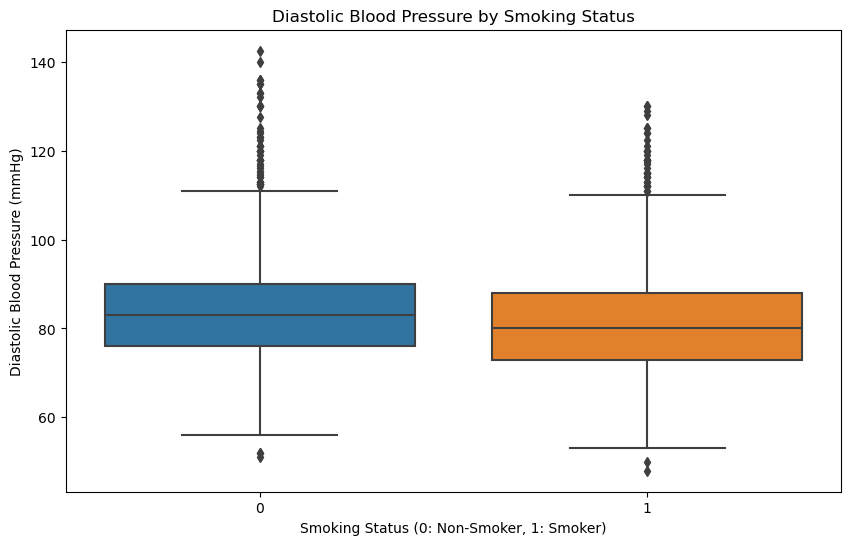

In [12]:
# Box Plot to Compare Diastolic Blood Pressure v. Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='currentSmoker', y='diaBP', data=FCDD)
plt.title('Diastolic Blood Pressure by Smoking Status')
plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.show()

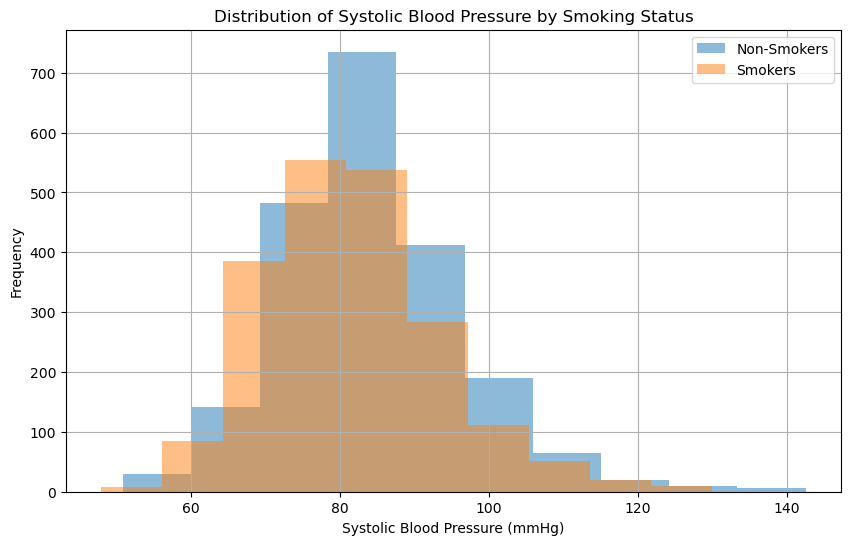

In [13]:
plt.figure(figsize=(10, 6))
FCDD[FCDD['currentSmoker'] == 0]['diaBP'].hist(alpha=0.5, label='Non-Smokers')
FCDD[FCDD['currentSmoker'] == 1]['diaBP'].hist(alpha=0.5, label='Smokers')
plt.title('Distribution of Systolic Blood Pressure by Smoking Status')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

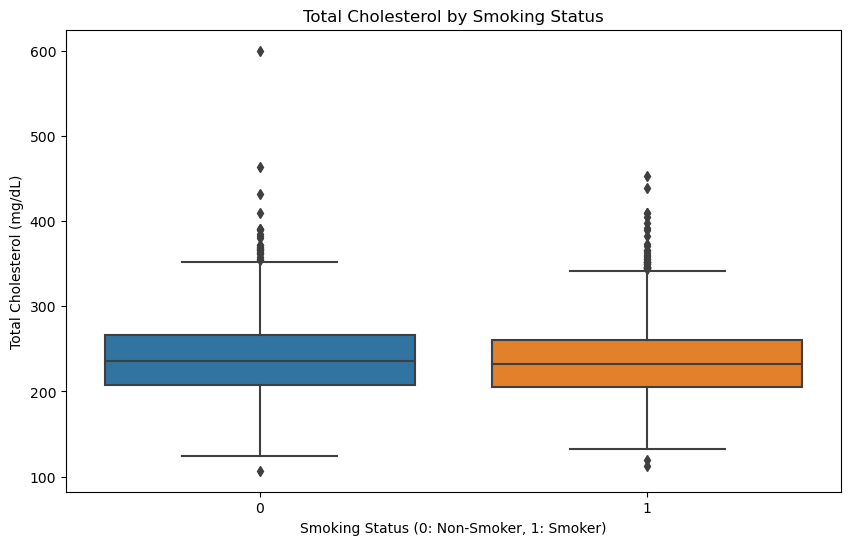

In [14]:
# Box Plot to Compare Diastolic Blood Pressure v. Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='currentSmoker', y='totChol', data=FCDD)
plt.title('Total Cholesterol by Smoking Status')
plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Total Cholesterol (mg/dL)')
plt.show()

In [15]:
FCDD_smoker=FCDD[FCDD.currentSmoker==1]
FCDD_nonsmoker=FCDD[FCDD.currentSmoker==0]

<Axes: xlabel='age', ylabel='diaBP'>

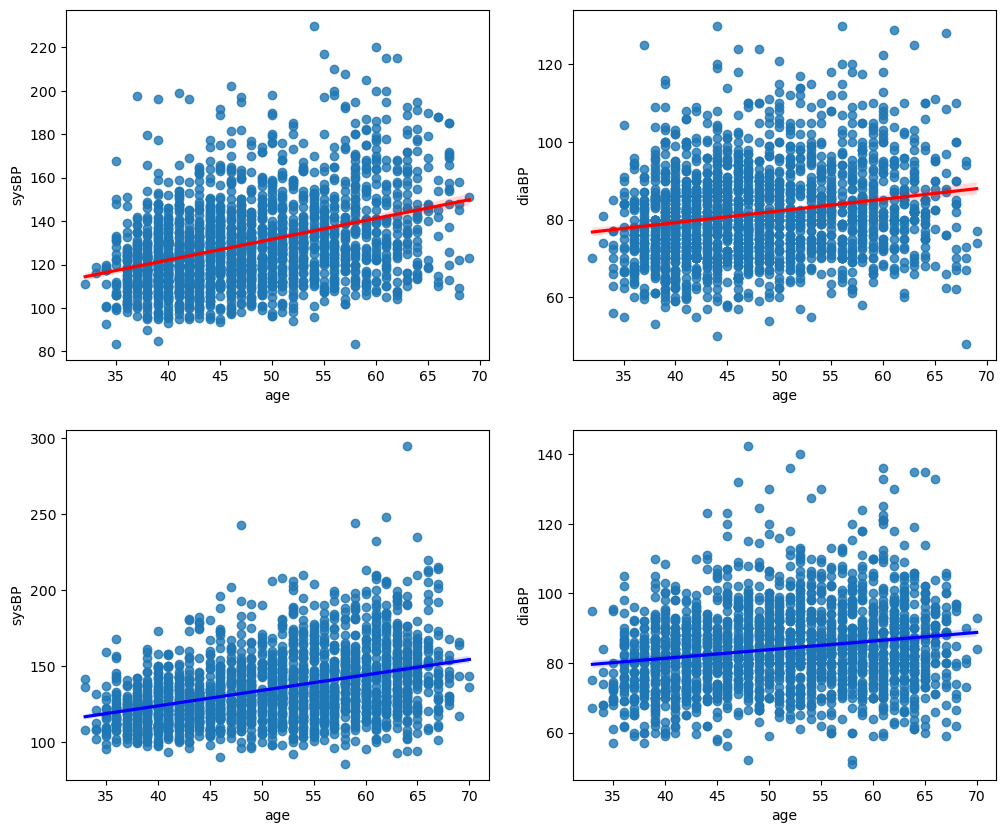

In [16]:
fig, ax= plt.subplots(2 , 2, figsize=(12, 10))
sns.regplot(x='age', y='sysBP', data=FCDD_smoker, ax=ax[0, 0], line_kws={'color': 'red'})
sns.regplot(x='age', y='diaBP', data=FCDD_smoker, ax=ax[0, 1], line_kws={'color': 'red'})
sns.regplot(x='age', y='sysBP', data=FCDD_nonsmoker, ax=ax[1, 0], line_kws={'color': 'blue'})
sns.regplot(x='age', y='diaBP', data=FCDD_nonsmoker, ax=ax[1, 1], line_kws={'color': 'blue'})
#plt.savefig('BPsubplots.png')

# Cholesterol Metrics

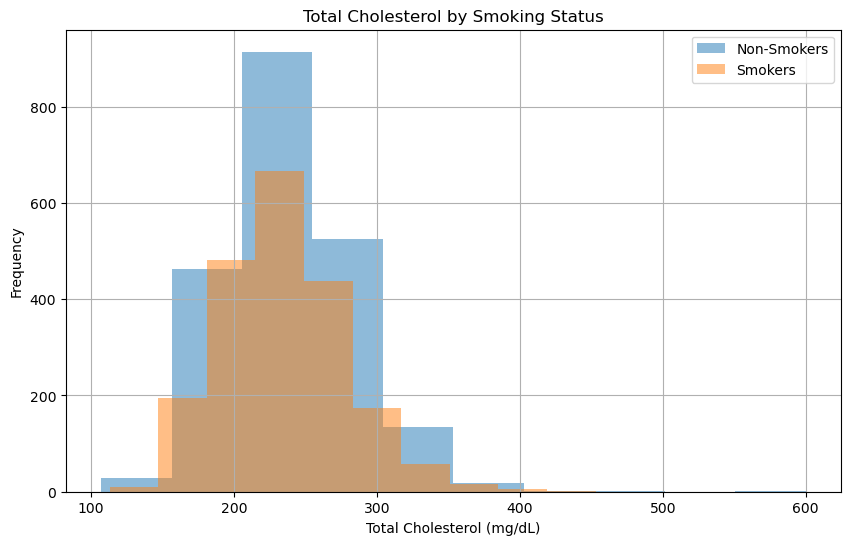

In [17]:
plt.figure(figsize=(10, 6))
FCDD[FCDD['currentSmoker'] == 0]['totChol'].hist(alpha=0.5, label='Non-Smokers')
FCDD[FCDD['currentSmoker'] == 1]['totChol'].hist(alpha=0.5, label='Smokers')
plt.title('Total Cholesterol by Smoking Status')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Interestingly, this visualization helps bring to light marked variability among the non-smoker group, where there seems to be a few of the high variables we noticed in our sanity check. This hardly tells the full story, but it is a helpful note to make that the non-smoker group seems to have a wider interquartile range on the box plots than the smoker group, and that trend carries with the histograms.

 Overall, we will move on to other variables and gather additional context for our analysis.

# Hear Rate metrics

In [18]:
two_keys_heartrate=FCDD.heartRate.groupby([FCDD.currentSmoker,FCDD.male])

Text(0.5, 0, 'Smoker Status')

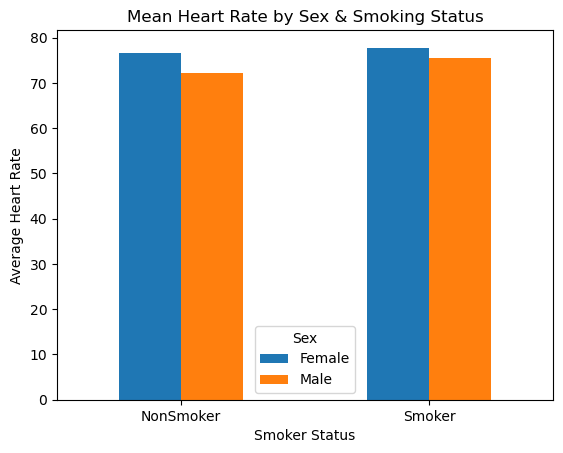

In [19]:
two_keys_heartrate.mean().unstack().plot(kind='bar')
plt.legend(['Female', 'Male'], title='Sex')
plt.title("Mean Heart Rate by Sex & Smoking Status")
plt.xticks([0, 1], ['NonSmoker', 'Smoker'], rotation=0)
plt.ylabel("Average Heart Rate")
plt.xlabel("Smoker Status")
#plt.savefig("mean_heart_rate_plot.png")


In [20]:
FCDD_smoker.cigsPerDay.max()

70.0

Text(0, 0.5, 'Heart Rate')

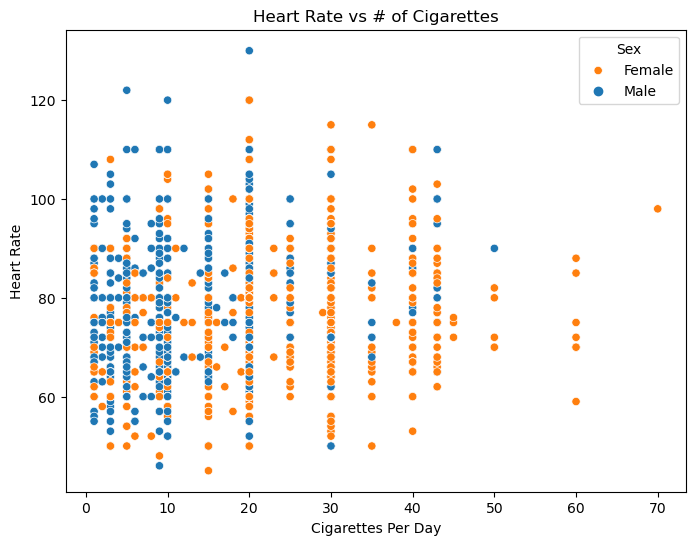

In [21]:

plt.figure(figsize=(8, 6))

sns.scatterplot(x='cigsPerDay', y='heartRate', hue='male', data=FCDD_smoker)

plt.title('Heart Rate vs # of Cigarettes')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Heart Rate')
#plt.savefig("HeartRatevs#ofcigs")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '23.0'),
  Text(21, 0, '25.0'),
  Text(22, 0, '29.0'),
  Text(23, 0, '30.0'),
  Text(24, 0, '35.0'),
  Text(25, 0, '38.0'),
  Text(26, 0, '40.0'),
  Text(27, 0, '43.0'),
  Text(28, 0, '45.0'),
  Text(29, 0, '50.0'),
  Text(30, 0, '60.0'),
  Text(31, 0, '70.0')])

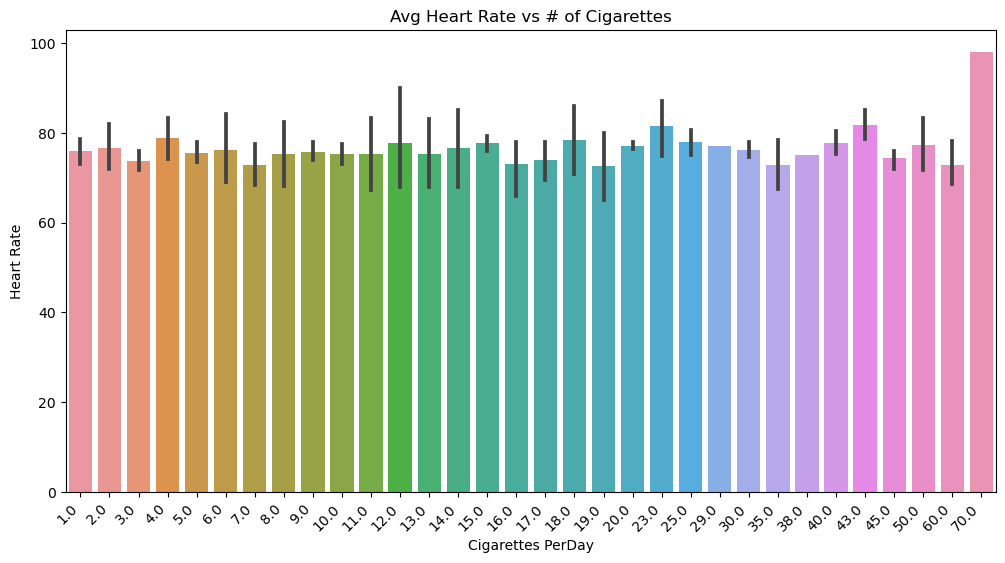

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cigsPerDay', y='heartRate', data=FCDD_smoker)
plt.title('Avg Heart Rate vs # of Cigarettes')
plt.xlabel('Cigarettes PerDay')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45, ha='right')
#plt.savefig("Avg#ofcigs")

In [23]:
#Pivot Table 
#what is the average heart rate per smoking status, per gender, and 10-year risk of future (CHD) coronary heart disease?
plt = FCDD.pivot_table(values=['heartRate'] ,index = ['currentSmoker','male'] , columns='TenYearCHD', margins=True)
plt.columns = ['No_CHD', 'CHD_Risk', 'All']
plt = plt.rename(index={0: 'Female', 1: 'Male'}, level='male')
plt = plt.rename(index={0: 'NonSmoker', 1: 'Smoker'}, level='currentSmoker')
plt.index = plt.index.set_names(['Smoking Status', 'Sex'])
#plt.to_csv('plt.csv')
plt.head(10)

No_CHD   CHD_Risk        All
Smoking Status Sex                                    
NonSmoker      Female  76.738017  76.326316  76.682143
               Male    72.158813  72.982609  72.296512
Smoker         Female  77.577416  79.537037  77.796277
               Male    75.217845  77.032558  75.579777
All                    75.820827  76.507962  75.925236

In [24]:
FCDD_cigs=FCDD_smoker[FCDD_smoker.cigsPerDay<50.0]

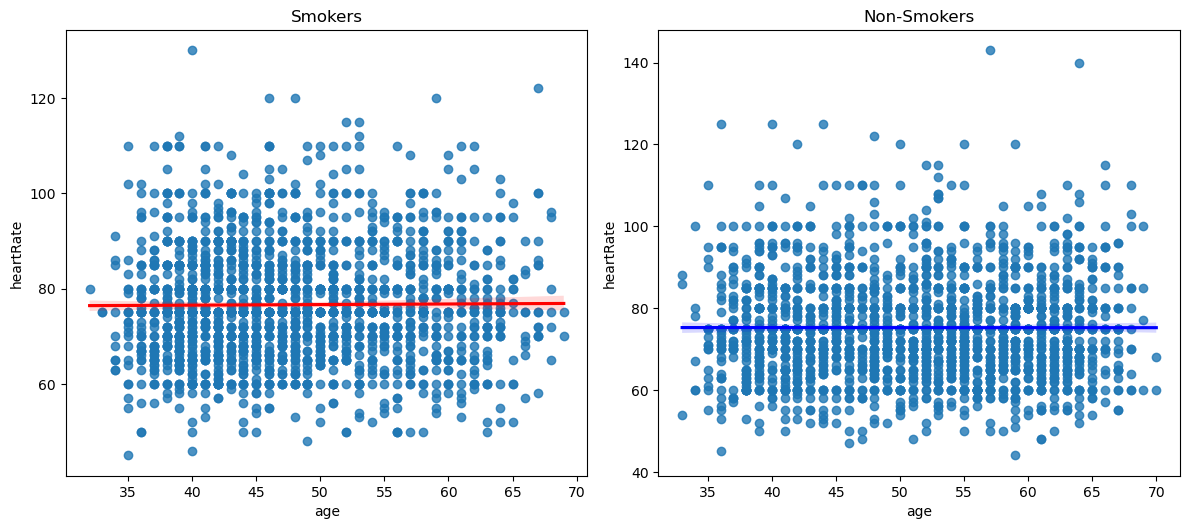

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot regression for heart rate vs. age for smokers
sns.regplot(x='age', y='heartRate', data=FCDD_smoker, ax=ax[0, 0], line_kws={'color': 'red'})
ax[0, 0].set_title('Smokers')

# Plot regression for heart rate vs. age for non-smokers
sns.regplot(x='age', y='heartRate', data=FCDD_nonsmoker, ax=ax[0, 1], line_kws={'color': 'blue'})
ax[0, 1].set_title('Non-Smokers')

# Remove the empty subplot in the bottom row
fig.delaxes(ax[1, 0])
fig.delaxes(ax[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


<Axes: xlabel='TenYearCHD', ylabel='currentSmoker'>

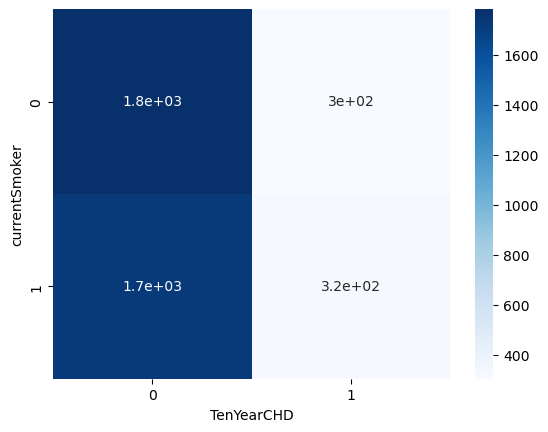

In [26]:
#heat map
sns.heatmap(pd.crosstab(FCDD['currentSmoker'], FCDD['TenYearCHD']), annot=True, cmap='Blues')
#plt.title('Relationship between CHDRisk and Smoking Status')

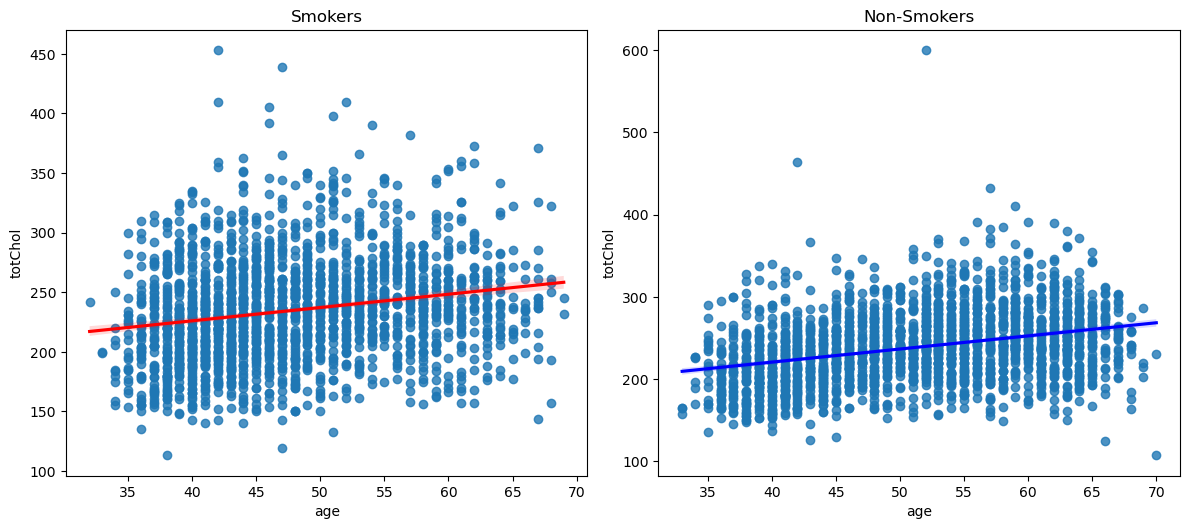

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot regression for total cholesterol vs. age for smokers
sns.regplot(x='age', y='totChol', data=FCDD_smoker, ax=ax[0, 0], line_kws={'color': 'red'})
ax[0, 0].set_title('Smokers')

# Plot regression for total cholesterol vs. age for non-smokers
sns.regplot(x='age', y='totChol', data=FCDD_nonsmoker, ax=ax[0, 1], line_kws={'color': 'blue'})
ax[0, 1].set_title('Non-Smokers')

# Remove the empty subplot in the bottom row
fig.delaxes(ax[1, 0])
fig.delaxes(ax[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


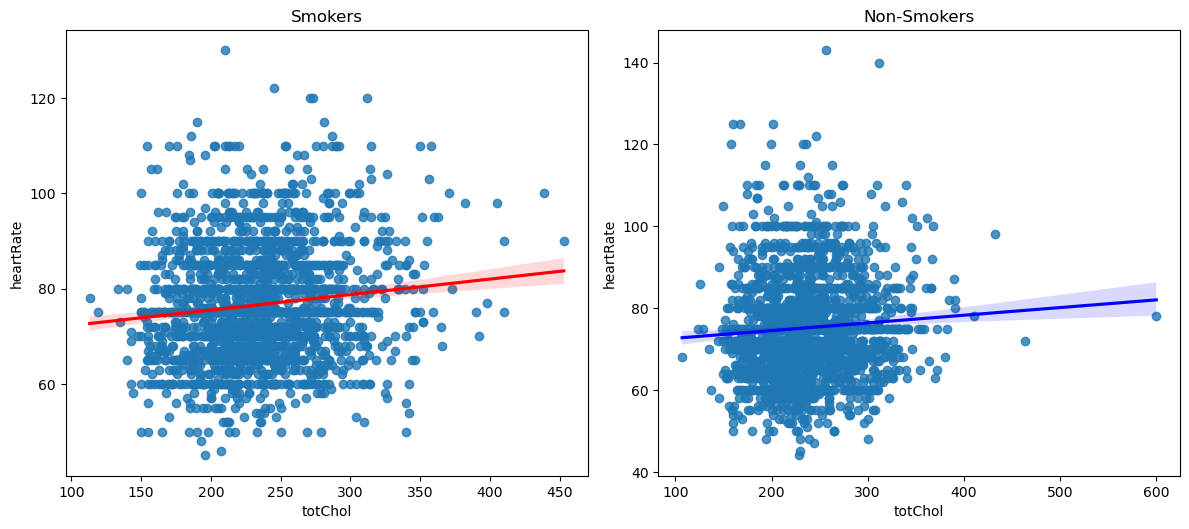

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot regression for heart rate vs. total cholesterol for smokers
sns.regplot(x='totChol', y='heartRate', data=FCDD_smoker, ax=ax[0, 0], line_kws={'color': 'red'})
ax[0, 0].set_title('Smokers')

# Plot regression for heart rate vs. total cholesterol for non-smokers
sns.regplot(x='totChol', y='heartRate', data=FCDD_nonsmoker, ax=ax[0, 1], line_kws={'color': 'blue'})
ax[0, 1].set_title('Non-Smokers')

# Remove the empty subplot in the bottom row
fig.delaxes(ax[1, 0])
fig.delaxes(ax[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


How do cardiovscular feuatures like (e.g., age, cholesterol) of patients affect average heart rate among patients who smoke?
-take 30 percent(exploation/training set) out and use random seed go and use it as your exploration data sets
-on remianing 70 percent use test data set don't  use until you have finalized model formulation(run on test set) only test once 

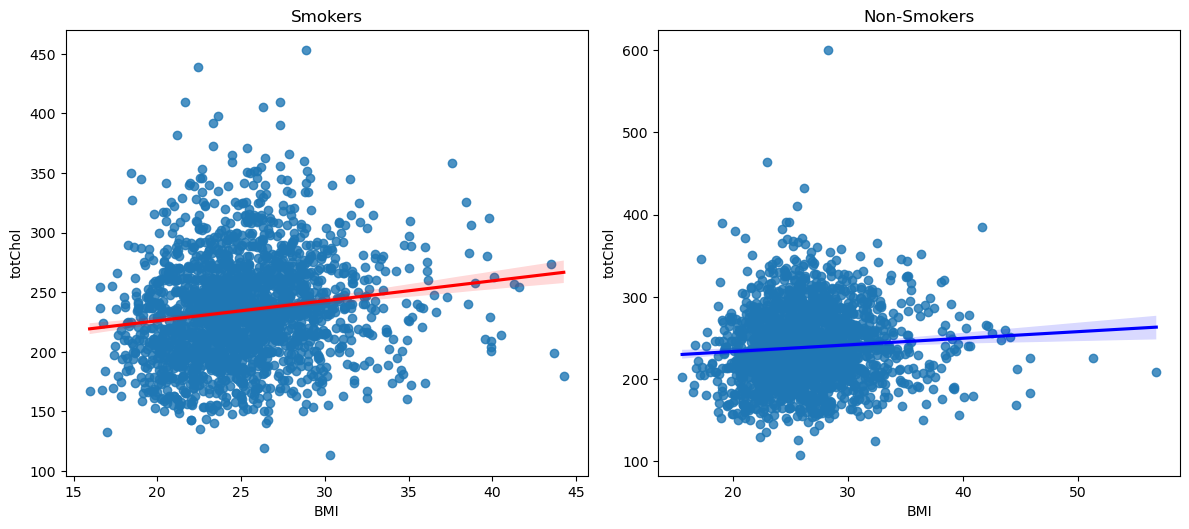

In [29]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot regression for heart rate vs. total cholesterol for smokers
sns.regplot(x='BMI', y='totChol', data=FCDD_smoker, ax=ax[0, 0], line_kws={'color': 'red'})
ax[0, 0].set_title('Smokers')

# Plot regression for heart rate vs. total cholesterol for non-smokers
sns.regplot(x='BMI', y='totChol', data=FCDD_nonsmoker, ax=ax[0, 1], line_kws={'color': 'blue'})
ax[0, 1].set_title('Non-Smokers')

# Remove the empty subplot in the bottom row
fig.delaxes(ax[1, 0])
fig.delaxes(ax[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
FCDD_nonsmoker.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
5,0,43,0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
8,1,52,0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0


In [31]:
FCDD_nonsmoker_lin = FCDD_nonsmoker[['age', 'totChol','male']]

In [32]:
FCDD_nonsmoker_lin.head()

,age,totChol,male
0,39,195.0,1
1,46,250.0,0
5,43,228.0,0
6,63,205.0,0
8,52,260.0,1


In [33]:
x=FCDD_nonsmoker_lin.drop(['totChol'], axis=1).values
y=FCDD_nonsmoker_lin['totChol']

In [34]:
from sklearn.model_selection import train_test_split 

***Split into training and test set***

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

***Train Model on the training set***

In [36]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

***Predicting the Test Set Results***

In [37]:
y_pred=ml.predict(x_test)
print(y_pred)

[213.35355853 227.66818393 201.82865916 247.42515428 242.4859117
 226.02176973 229.8177005  252.36439687 268.82853884 239.1930833
 257.30363946 218.29280112 247.42515428 242.4859117  254.51391344
 263.88929625 205.12148755 241.34259987 226.02176973 226.52487211
 254.01081107 267.18212464 263.88929625 218.29280112 257.30363946
 260.59646786 260.59646786 250.71798268 221.08252714 234.25384071
 260.59646786 226.02176973 226.52487211 238.04977148 265.53571044
 223.23204371 227.66818393 258.95005366 216.64638693 262.24288205
 210.06073014 252.36439687 231.46411469 233.11052889 252.36439687
 235.90025491 237.54666911 249.07156848 239.1930833  249.07156848
 244.13232589 260.59646786 228.1712863  208.41431595 268.82853884
 210.06073014 219.93921532 239.1930833  245.77874009 251.22108505
 235.90025491 245.77874009 250.71798268 258.95005366 250.71798268
 229.8177005  265.53571044 256.16032764 257.30363946 206.76790175
 222.72894134 227.66818393 262.24288205 250.71798268 260.59646786
 229.3145981

In [38]:
ml.predict([[39,1]])

array([210.06073014])

***Evaluating Model***